## DON'T FORGET

There is a reson why there is frequency offset M and MS & Q and QS. Because, while resampling or using asfreq functions, if we need to put the label as the starting of these periods|groups and if we use only M|Q, then last day of that bin|period is used as label. Sometimes, like in %_range() methods, LABEL='...' argument is not present. Hence we will use the MS|QS in this case. This is just used to label the period|bin.

### SM is not same as MS. Same goes for SQ and QS, and other similar offsets

In [1]:
import pandas as pd
df = pd.read_csv('./nasdaq_goog.csv', parse_dates=['Date'], index_col=['Date'])
df.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 16:00:00,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-03 16:00:00,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-06 16:00:00,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-07 16:00:00,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-08 16:00:00,1392.08,1411.58,1390.84,1404.32,1529177
2020-01-09 16:00:00,1420.57,1427.33,1410.27,1419.83,1502664
2020-01-10 16:00:00,1427.56,1434.93,1418.35,1429.73,1821566
2020-01-13 16:00:00,1436.13,1440.52,1426.02,1439.23,1653482
2020-01-14 16:00:00,1439.01,1441.80,1428.37,1430.88,1560453


In [2]:
df['2020-07']['Close'].mean()

<ipython-input-2-fb8e80cecb43>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-07']['Close'].mean()


1513.5731818181819

In [3]:
df['2020-07' : '2020-08'].head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-01 16:00:00,1411.10,1443.00,1409.82,1438.04,1775167
2020-07-02 16:00:00,1446.94,1482.95,1446.42,1464.70,1859480
2020-07-06 16:00:00,1480.06,1506.59,1472.86,1495.70,1563997
2020-07-07 16:00:00,1490.00,1516.80,1483.55,1485.18,1458172
2020-07-08 16:00:00,1494.32,1505.88,1485.63,1496.00,1249658
2020-07-09 16:00:00,1506.45,1522.72,1488.09,1510.99,1423322
2020-07-10 16:00:00,1506.15,1543.83,1496.54,1541.74,1856704
2020-07-13 16:00:00,1550.00,1577.13,1505.24,1511.34,1846424
2020-07-14 16:00:00,1490.31,1522.95,1483.50,1520.58,1585016


In [4]:
df['Close'].resample('M').mean()    # in downsamp: closed='left'(def)|'right', label='left'(def)|'right' ;;; in upsamp: convention='start'|'end' (for data point, rest will be NaN)
# resampling makes the bins of the data where number of bins depends on the frequency of resampling. Aggregate functions on resampled data performs on each bin
# without any aggregate function, this will give DatetimeIndexResampler Object, which is non iterable, but kind of similar to groupby object.

### Date Range

In [ ]:
df1 = df
df1.reset_index(drop=True, inplace=True)
df1

,Open,High,Low,Close,Volume
0,1341.55,1368.14,1341.55,1367.37,1406731
1,1347.86,1372.50,1345.54,1360.66,1187006
2,1350.00,1396.50,1350.00,1394.21,1733149
3,1397.94,1402.99,1390.38,1393.34,1511693
4,1392.08,1411.58,1390.84,1404.32,1529177
...,...,...,...,...,...
247,1728.11,1747.99,1725.04,1732.38,1033917
248,1735.00,1746.00,1729.11,1738.85,346753
249,1751.64,1790.73,1746.34,1776.09,1393033
250,1787.79,1792.44,1756.09,1758.72,1299395


In [ ]:
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='B')    # 'B' only eliminates Weekends, NOT the occasional holidays
print(date_rng)


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=262, freq='B')


In [ ]:
pd.date_range(start='2020-01-12', end='2020-12-31', freq='Q') 

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

## OFFSET aliases
https://pandas.pydata.org/pandas-docs/version/0.22/timeseries.html#offset-aliases

In [ ]:
print(pd.date_range(start='2020-01-12', end='2020-12-31', freq='QS'))  # observe that if label value is not present(2020-01-01) then that range wont be included
print(pd.date_range(start='2020-01-12', end='2020-12-31', freq='SMS'))  # there is no SQ present. Because, its absurd to find the mis of any quarter

DatetimeIndex(['2020-04-01', '2020-07-01', '2020-10-01'], dtype='datetime64[ns]', freq='QS-JAN')
DatetimeIndex(['2020-01-15', '2020-02-01', '2020-02-15', '2020-03-01',
               '2020-03-15', '2020-04-01', '2020-04-15', '2020-05-01',
               '2020-05-15', '2020-06-01', '2020-06-15', '2020-07-01',
               '2020-07-15', '2020-08-01', '2020-08-15', '2020-09-01',
               '2020-09-15', '2020-10-01', '2020-10-15', '2020-11-01',
               '2020-11-15', '2020-12-01', '2020-12-15'],
              dtype='datetime64[ns]', freq='SMS-15')


In [ ]:
df.set_index(date_rng[:len(df)], inplace=True)
df

,Open,High,Low,Close,Volume
2020-01-01,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-02,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-03,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-06,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-07,1392.08,1411.58,1390.84,1404.32,1529177
...,...,...,...,...,...
2020-12-11,1728.11,1747.99,1725.04,1732.38,1033917
2020-12-14,1735.00,1746.00,1729.11,1738.85,346753
2020-12-15,1751.64,1790.73,1746.34,1776.09,1393033
2020-12-16,1787.79,1792.44,1756.09,1758.72,1299395


<AxesSubplot:>

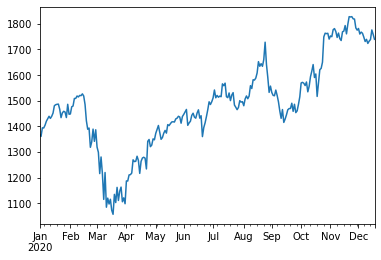

In [ ]:
%matplotlib inline
df['Close'].plot()  # kind='bar'

In [ ]:
df.asfreq('M', method='ffill')  # if method not provided, fills with NaN. Also fill_value=<some_def_value>
# ffill|pad & bfill|backfill    (fills the immediate value from above/below cell from the original df, not from newly generated df with new freq)
# as freq is like a filtering mechanism, where the row of based on specific freq is filtered out. Aggregate method on it will be applied on all those filtered row and give single answer
# during upsampling, data is attachecd to the first of the initial index value. Here, HOW='START'|'END' only works with the PeriodIndex. Not with any other datatype.

,Open,High,Low,Close,Volume
2020-01-31,1457.07,1469.50,1426.30,1447.07,3932954
2020-02-29,1359.23,1388.09,1343.11,1386.52,1913315
2020-03-31,1119.02,1123.54,1079.81,1097.88,2313400
2020-04-30,1361.69,1371.12,1347.29,1347.30,1215423
2020-05-31,1413.17,1445.05,1406.00,1438.39,1735244
2020-06-30,1494.32,1505.88,1485.63,1496.00,1249658
2020-07-31,1487.18,1504.08,1473.08,1496.10,1289530
2020-08-31,1557.53,1569.00,1536.05,1556.96,1774704
2020-09-30,1494.70,1516.52,1489.45,1515.22,1435542
2020-10-31,1731.09,1763.00,1717.30,1740.39,2636142


In [ ]:
pd.date_range(start='1/1/2020', periods=20, freq='M')   # if we dont know the end date, but we know the number of dates to generate

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# GENERATING RANDOM DATA
rng = pd.date_range(start='1947-12-18', periods=50, freq='B')
import numpy as np
dum_df = pd.DataFrame(np.random.randint(1, 10, len(rng)), index=rng)
dum_df.head(10)

,0
1947-12-18,1
1947-12-19,5
1947-12-22,3
1947-12-23,4
1947-12-24,1
1947-12-25,1
1947-12-26,4
1947-12-29,7
1947-12-30,2
1947-12-31,1


In [ ]:
pd.date_range(start='1947-10-18', periods=50, freq='Q-FEB') # remember that there could also be QS-FEB
# WE DONT HAVE LABEL OPTION AS AN ARGUMENT HERE.

DatetimeIndex(['1947-11-30', '1948-02-29', '1948-05-31', '1948-08-31',
               '1948-11-30', '1949-02-28', '1949-05-31', '1949-08-31',
               '1949-11-30', '1950-02-28', '1950-05-31', '1950-08-31',
               '1950-11-30', '1951-02-28', '1951-05-31', '1951-08-31',
               '1951-11-30', '1952-02-29', '1952-05-31', '1952-08-31',
               '1952-11-30', '1953-02-28', '1953-05-31', '1953-08-31',
               '1953-11-30', '1954-02-28', '1954-05-31', '1954-08-31',
               '1954-11-30', '1955-02-28', '1955-05-31', '1955-08-31',
               '1955-11-30', '1956-02-29', '1956-05-31', '1956-08-31',
               '1956-11-30', '1957-02-28', '1957-05-31', '1957-08-31',
               '1957-11-30', '1958-02-28', '1958-05-31', '1958-08-31',
               '1958-11-30', '1959-02-28', '1959-05-31', '1959-08-31',
               '1959-11-30', '1960-02-29'],
              dtype='datetime64[ns]', freq='Q-FEB')

In [ ]:
pd.date_range(start='1947-11-18', periods=50, freq='Q')

DatetimeIndex(['1947-12-31', '1948-03-31', '1948-06-30', '1948-09-30',
               '1948-12-31', '1949-03-31', '1949-06-30', '1949-09-30',
               '1949-12-31', '1950-03-31', '1950-06-30', '1950-09-30',
               '1950-12-31', '1951-03-31', '1951-06-30', '1951-09-30',
               '1951-12-31', '1952-03-31', '1952-06-30', '1952-09-30',
               '1952-12-31', '1953-03-31', '1953-06-30', '1953-09-30',
               '1953-12-31', '1954-03-31', '1954-06-30', '1954-09-30',
               '1954-12-31', '1955-03-31', '1955-06-30', '1955-09-30',
               '1955-12-31', '1956-03-31', '1956-06-30', '1956-09-30',
               '1956-12-31', '1957-03-31', '1957-06-30', '1957-09-30',
               '1957-12-31', '1958-03-31', '1958-06-30', '1958-09-30',
               '1958-12-31', '1959-03-31', '1959-06-30', '1959-09-30',
               '1959-12-31', '1960-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

## HOLIDAY CALENDER for handling the extra holidays dates in date_range of 'B' frequency

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [ ]:
pd.date_range(start='7/1/2017', end='7/21/2017', freq=usb)  # it has not included the holidays

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

## to_datetime

In [ ]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05', '20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates = ['2017-01-05 2:30:00', '2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017', '2017.01.05', '2017/01/05', '20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05 02:30:00', '2017-01-05 14:30:00',
               '2017-01-05 14:30:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05', '20170105']
pd.to_datetime(dates, dayfirst=True)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-05-01', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime('5#1#2017', format='%d#%m#%Y')

Timestamp('2017-01-05 00:00:00')

In [ ]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05', '20170105', 'abc']
pd.to_datetime(dates, errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05',        'NaT'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# making datetime via epoch
t = 1501356749
pd.to_datetime(t, unit='s') # by default, the unit is set to ns. Hence we need to override it because the epoch is no. of seconds since 01-01-1970

Timestamp('2017-07-29 19:32:29')

In [ ]:
t = 1501356749
pd.to_datetime([t], unit='s')

DatetimeIndex(['2017-07-29 19:32:29'], dtype='datetime64[ns]', freq=None)

In [ ]:
t = 1501356749
dt = pd.to_datetime([t], unit='s')
dt.view('int64')

array([1501356749000000000])

## period; period index

Since it is period(range of time), hence there is no concept of QS or MS. Instead there is just Q and M and several others

In [ ]:
y = pd.Period('2016')
y   # in o/p, A-DEC means that period is Annual, ending with December

Period('2016', 'A-DEC')

In [ ]:
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_add_offset',
 '_dtype',
 '_from_ordinal',
 '_get_to_timestamp_base',
 '_maybe_convert_freq',
 'asfreq',
 'day',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [ ]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [ ]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [ ]:
m = pd.Period('2011-01', freq='M')
m

Period('2011-01', 'M')

In [ ]:
m.start_time

Timestamp('2011-01-01 00:00:00')

In [ ]:
m.end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [ ]:
# periods can perform arithmetic operations. It also can perform the arithmetics between two periods of same frequency.
m+13

Period('2012-02', 'M')

In [ ]:
d = pd.Period('2016-01-28', freq='D')   # by default, it will put freq='D'
d

Period('2016-01-28', 'D')

In [ ]:
d+1 # it was aware of the leap year

Period('2016-01-29', 'D')

In [ ]:
d0 = pd.Period('2017-01-09 11:50:34.345')       # fro FRAC SEC, [0-3]rd digits will be considered for 3 digits with freq 'L', for [4-6]th digits freq='U', for [7-9] freq='N'
d0+1010

Period('2017-01-09 11:50:35.355', 'L')

### Working with Quarter with pd.Period FREQ attr is set to 'Q-DEC' by default. Qn should be appeneded with the YYYY as YYYYQn. If custom freq is given, then end of fourth quarter is shifted to that year mentioned as a first argument, and then with Qn, denotes overall that, quarter number Qn whose Q4 will be in the year YYYY, mentioned in YYYYQn. However, it is labelled by YYYYQn.

In [ ]:
q = pd.Period('2017Q1') # Q should be appended by number 1-4 (both inclusive), otherwise error will be thrown
q

Period('2017Q1', 'Q-DEC')

In [ ]:
q = pd.Period('2017Q2')
q+1

Period('2017Q3', 'Q-DEC')

In [ ]:
print(q.start_time, q.end_time)

2017-04-01 00:00:00 2017-06-30 23:59:59.999999999


In [ ]:
q2 = pd.Period('2017Q1', freq='Q-JAN')  # shifting quarter ending time
q2  # remeber, although its from 2016-02-01 to 2016-04-30, but it will be still labelled as (2017Q1, Q-JAN)

Period('2017Q1', 'Q-JAN')

In [ ]:
print(q2.start_time, q2.end_time)

2016-02-01 00:00:00 2016-04-30 23:59:59.999999999


In [ ]:
# Period or PeriodIndex asfreq() is little different from datetime asfreq()
q2.asfreq('M', how='start') # changing frequency to monthly. HOW='START'|'END' will decide that, while upsampling, what label shall be present, ie if start_time or end_time

Period('2016-02', 'M')

In [ ]:
q2.asfreq('M', how='end')

Period('2016-04', 'M')

## Period Index

In [ ]:
pd.period_range('2011', '2017', freq='Q')   # by default, both the YYYY years will be taken as YYYYQ1.

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [ ]:
pd.period_range(start=pd.Period('2011Q1'), end=pd.Period('2017Q3'), freq='Q')   # custom quarter range

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1', '2017Q2', '2017Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [ ]:
pd.period_range(start=pd.Period('2011Q1', freq='Q-FEB'), end=pd.Period('2017Q1', freq='Q-FEB'), freq='Q')
# Observe that o/p procues range from 2010Q2 to 2016Q2. It is because, its range is 01Mar2010 to 31May2016. These two dates are then rendered by outer frequency 'Q'
# Inner frequncy work is over before executing outer frequency. Hence, outer freq will just look these dates and form quarters as Q-DEC

PeriodIndex(['2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3',
             '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [ ]:
pd.period_range(start=pd.Period('2011Q1', freq='Q-FEB'), end=pd.Period('2017Q1', freq='Q-MAY'), freq='Q-NOV')

PeriodIndex(['2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3',
             '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [ ]:
pd.period_range('2011Q1', '2017Q4', freq='Q-JAN')
# pd.period_range(start=pd.Period('2011Q1', freq='Q'), end=pd.Period('2017Q1', freq='Q'), freq='Q-JAN')

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1', '2017Q2', '2017Q3', '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [ ]:
pd.period_range('2011', '2017', freq='Q-JAN')[4].end_time

Timestamp('2012-01-31 23:59:59.999999999')

In [ ]:
lux = pd.period_range('2011', periods=10, freq='Q-AUG') # for Q-AUG, in 2010, label-2010Q1 is sept-nov2010, label-2010Q2 is Dec2010-Jan2011-Mar2011. Since date starts from 20110101, hence it is 2010Q2.
lux

PeriodIndex(['2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3',
             '2012Q4', '2013Q1', '2013Q2', '2013Q3'],
            dtype='period[Q-AUG]', freq='Q-AUG')

In [ ]:
lux[0].start_time

Timestamp('2010-12-01 00:00:00')

In [ ]:
import numpy as np
ps = pd.Series(np.random.rand(len(lux)), index=lux)
ps

2011Q2    0.868130
2011Q3    0.540555
2011Q4    0.013708
2012Q1    0.929023
2012Q2    0.357978
2012Q3    0.056345
2012Q4    0.778911
2013Q1    0.785849
2013Q2    0.289942
2013Q3    0.301605
Freq: Q-AUG, dtype: float64

In [ ]:
ps['2010']  # this proves that indexing here takes reference of the underlying actual datetime. NOT the label

2011Q2    0.86813
Freq: Q-AUG, dtype: float64

In [ ]:
ps['2011']  # since 2011Q2 ranges from 2010-2011, hence it comes in both 2010 and 2011 indexing

2011Q2    0.868130
2011Q3    0.540555
2011Q4    0.013708
2012Q1    0.929023
2012Q2    0.357978
Freq: Q-AUG, dtype: float64

In [ ]:
ps['2011':'2013']

2011Q2    0.868130
2011Q3    0.540555
2011Q4    0.013708
2012Q1    0.929023
2012Q2    0.357978
2012Q3    0.056345
2012Q4    0.778911
2013Q1    0.785849
2013Q2    0.289942
2013Q3    0.301605
Freq: Q-AUG, dtype: float64

In [ ]:
pst = ps.to_timestamp() # Since we are converting a range to a point of time, therefore there must be HOW='START'(def)|'END'. Also there can be FREQ='..-.....'
pst

2010-12-01    0.868130
2011-03-01    0.540555
2011-06-01    0.013708
2011-09-01    0.929023
2011-12-01    0.357978
2012-03-01    0.056345
2012-06-01    0.778911
2012-09-01    0.785849
2012-12-01    0.289942
2013-03-01    0.301605
Freq: QS-DEC, dtype: float64

In [ ]:
pst.index

DatetimeIndex(['2010-12-01', '2011-03-01', '2011-06-01', '2011-09-01',
               '2011-12-01', '2012-03-01', '2012-06-01', '2012-09-01',
               '2012-12-01', '2013-03-01'],
              dtype='datetime64[ns]', freq='QS-DEC')

In [ ]:
pst.to_period() # freq='......' can also be given

2010Q4    0.868130
2011Q1    0.540555
2011Q2    0.013708
2011Q3    0.929023
2011Q4    0.357978
2012Q1    0.056345
2012Q2    0.778911
2012Q3    0.785849
2012Q4    0.289942
2013Q1    0.301605
Freq: Q-DEC, dtype: float64

In [ ]:
df69 = pd.read_csv('./wmt.csv')
df69

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [ ]:
df69.set_index('Line Item', inplace=True)

In [ ]:
df69 = df69.T   # transpose

In [ ]:
df69

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [ ]:
df69.index  # it is of type object. We need to convert it to period type

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [ ]:
df69.index = pd.PeriodIndex(df69.index, freq='Q-JAN')
df69.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [ ]:
df69['start date'] = df69.index.map( lambda x : x.start_time)
df69

Line Item,Revenue,Expenses,Profit,start date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [ ]:
df69['end date'] = df69.index.map( lambda x : x.end_time.date)
df69

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30
2017Q2,120854,89485,31369,2016-05-01,2016-07-31
2017Q3,118179,87484,30695,2016-08-01,2016-10-31
2017Q4,130936,97743,33193,2016-11-01,2017-01-31
2018Q1,117542,87688,29854,2017-02-01,2017-04-30


# TZ
 Two types: Naive datetime (not aware of TZ); TZ aware datetime

In [ ]:
df = pd.read_csv('./nasdaq_goog.csv', index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 16:00:00,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-03 16:00:00,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-06 16:00:00,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-07 16:00:00,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-08 16:00:00,1392.08,1411.58,1390.84,1404.32,1529177
...,...,...,...,...,...
2020-12-23 16:00:00,1728.11,1747.99,1725.04,1732.38,1033917
2020-12-24 13:00:00,1735.00,1746.00,1729.11,1738.85,346753
2020-12-28 16:00:00,1751.64,1790.73,1746.34,1776.09,1393033


In [ ]:
# converting naive datetime to some timezone aware datetime
df = df.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2020-01-02 16:00:00-05:00', '2020-01-03 16:00:00-05:00',
               '2020-01-06 16:00:00-05:00', '2020-01-07 16:00:00-05:00',
               '2020-01-08 16:00:00-05:00', '2020-01-09 16:00:00-05:00',
               '2020-01-10 16:00:00-05:00', '2020-01-13 16:00:00-05:00',
               '2020-01-14 16:00:00-05:00', '2020-01-15 16:00:00-05:00',
               ...
               '2020-12-16 16:00:00-05:00', '2020-12-17 16:00:00-05:00',
               '2020-12-18 16:00:00-05:00', '2020-12-21 16:00:00-05:00',
               '2020-12-22 16:00:00-05:00', '2020-12-23 16:00:00-05:00',
               '2020-12-24 13:00:00-05:00', '2020-12-28 16:00:00-05:00',
               '2020-12-29 16:00:00-05:00', '2020-12-30 16:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date', length=252, freq=None)

In [ ]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [ ]:
# df = df.tz_localize(tz='Asia/Calcutta')   # once it is localized, ie converted to UTC, again it wont be converted.
# we need to use tz_convert
df = df.tz_convert('Asia/Calcutta') # can be None also in the brcaket
# df.index = df.index.tz_convert('Asia/Calcutta')       # similar effect
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-03 02:30:00+05:30,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-04 02:30:00+05:30,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-07 02:30:00+05:30,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-08 02:30:00+05:30,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-09 02:30:00+05:30,1392.08,1411.58,1390.84,1404.32,1529177
...,...,...,...,...,...
2020-12-24 02:30:00+05:30,1728.11,1747.99,1725.04,1732.38,1033917
2020-12-24 23:30:00+05:30,1735.00,1746.00,1729.11,1738.85,346753
2020-12-29 02:30:00+05:30,1751.64,1790.73,1746.34,1776.09,1393033


In [ ]:
#  normally date_range creates naive datetimeIndex
rng = pd.date_range(start='1/1/2017', periods=10, freq='H')
rng

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
rng = pd.date_range(start='1/1/2017', periods=10, freq='H', tz='Asia/Calcutta')
rng

DatetimeIndex(['2017-01-01 00:00:00+05:30', '2017-01-01 01:00:00+05:30',
               '2017-01-01 02:00:00+05:30', '2017-01-01 03:00:00+05:30',
               '2017-01-01 04:00:00+05:30', '2017-01-01 05:00:00+05:30',
               '2017-01-01 06:00:00+05:30', '2017-01-01 07:00:00+05:30',
               '2017-01-01 08:00:00+05:30', '2017-01-01 09:00:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq='H')

## arithmetic between two different TZs

In [ ]:
rng = pd.date_range(start='2017-08-22 09:00:00', periods=10, freq='30T')
s = pd.Series(range(10), index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [ ]:
b = s.tz_localize(tz='Europe/Berlin')
b.index

DatetimeIndex(['2017-08-22 09:00:00+02:00', '2017-08-22 09:30:00+02:00',
               '2017-08-22 10:00:00+02:00', '2017-08-22 10:30:00+02:00',
               '2017-08-22 11:00:00+02:00', '2017-08-22 11:30:00+02:00',
               '2017-08-22 12:00:00+02:00', '2017-08-22 12:30:00+02:00',
               '2017-08-22 13:00:00+02:00', '2017-08-22 13:30:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [ ]:
m = s.tz_localize(tz='Asia/Calcutta')
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
dtype: int64

In [ ]:
b+m # it found corresponding UTC TZs and performed addition only on equal UTC time. Rest all left as NaN

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

### Shifting and Lagging

In [ ]:
df = pd.read_csv('./nasdaq_goog.csv', parse_dates=['Date'], index_col='Date')
df.index = df.index.date
print(df.index)
df.index = pd.to_datetime(df.index)
df = df[['Open']]
df

Index([2020-01-02, 2020-01-03, 2020-01-06, 2020-01-07, 2020-01-08, 2020-01-09,
       2020-01-10, 2020-01-13, 2020-01-14, 2020-01-15,
       ...
       2020-12-16, 2020-12-17, 2020-12-18, 2020-12-21, 2020-12-22, 2020-12-23,
       2020-12-24, 2020-12-28, 2020-12-29, 2020-12-30],
      dtype='object', length=252)


,Open
2020-01-02,1341.55
2020-01-03,1347.86
2020-01-06,1350.00
2020-01-07,1397.94
2020-01-08,1392.08
...,...
2020-12-23,1728.11
2020-12-24,1735.00
2020-12-28,1751.64
2020-12-29,1787.79


In [ ]:
df.shift(1) # shifts data one cell down. Last cell data will be vanished, and first cell will get occupied by NaN. Shifting can be called on both DF and TimeSeries

,Open
2020-01-02,NaN
2020-01-03,1341.55
2020-01-06,1347.86
2020-01-07,1350.00
2020-01-08,1397.94
...,...
2020-12-23,1734.43
2020-12-24,1728.11
2020-12-28,1735.00
2020-12-29,1751.64


In [ ]:
df.shift(2)

,Open
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,1341.55
2020-01-07,1347.86
2020-01-08,1350.00
...,...
2020-12-23,1713.51
2020-12-24,1734.43
2020-12-28,1728.11
2020-12-29,1735.00


In [ ]:
df.shift(-2)    # shifts 2 cells up

,Open
2020-01-02,1350.00
2020-01-03,1397.94
2020-01-06,1392.08
2020-01-07,1420.57
2020-01-08,1427.56
...,...
2020-12-23,1751.64
2020-12-24,1787.79
2020-12-28,1762.01
2020-12-29,NaN


In [ ]:
# application: to check change in price
df['Prev Day Price'] = df['Open'].shift(1)
df

,Open,Prev Day Price
2020-01-02,1341.55,NaN
2020-01-03,1347.86,1341.55
2020-01-06,1350.00,1347.86
2020-01-07,1397.94,1350.00
2020-01-08,1392.08,1397.94
...,...,...
2020-12-23,1728.11,1734.43
2020-12-24,1735.00,1728.11
2020-12-28,1751.64,1735.00
2020-12-29,1787.79,1751.64


In [ ]:
df['Price Chnage in 1 day'] = df['Prev Day Price'] - df['Open']
df

,Open,Prev Day Price,Price Chnage in 1 day
2020-01-02,1341.55,NaN,NaN
2020-01-03,1347.86,1341.55,-6.31
2020-01-06,1350.00,1347.86,-2.14
2020-01-07,1397.94,1350.00,-47.94
2020-01-08,1392.08,1397.94,5.86
...,...,...,...
2020-12-23,1728.11,1734.43,6.32
2020-12-24,1735.00,1728.11,-6.89
2020-12-28,1751.64,1735.00,-16.64
2020-12-29,1787.79,1751.64,-36.15


In [ ]:
# now instead of shifting of data points, we will shift the dates
df = df[['Open']]
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=252, freq=None)

In [ ]:
df.index = pd.to_datetime(df.index)
df

,Open
2020-01-02,1341.55
2020-01-03,1347.86
2020-01-06,1350.00
2020-01-07,1397.94
2020-01-08,1392.08
...,...
2020-12-23,1728.11
2020-12-24,1735.00
2020-12-28,1751.64
2020-12-29,1787.79


In [ ]:
df.index        # its frequency is None. But it is 'B'  type frequency. So, shifting wont have idea that by what value(freq), dates need to be shifted

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=252, freq=None)

In [ ]:
df.index = pd.date_range(start=df.index.min(), periods=len(df.index), freq='B')
df.index    # index has now frequency

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18'],
              dtype='datetime64[ns]', length=252, freq='B')

In [ ]:
df.tshift(1)    # neagtive value is also supported

<ipython-input-113-0decad11b128>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(1)    # neagtive value is also supported


,Open
2020-01-03,1341.55
2020-01-06,1347.86
2020-01-07,1350.00
2020-01-08,1397.94
2020-01-09,1392.08
...,...
2020-12-15,1728.11
2020-12-16,1735.00
2020-12-17,1751.64
2020-12-18,1787.79


# COreys

In [ ]:
import datetime

In [ ]:
d = datetime.date(2016,7,24)    # digits are passed, without prefixed zero in the day or month part
print(d)
d

2016-07-24


datetime.date(2016, 7, 24)

In [ ]:
tday = datetime.date.today()
tday

datetime.date(2021, 8, 16)

In [ ]:
print(tday.year, tday.day, tday.month)

2021 16 8


In [ ]:
print( tday.isoweekday(), tday.weekday())   # iso::Monday:1 & Sunday:7      #normal::Monday:0 & Sunday:6

1 0


In [ ]:
tdelta = datetime.timedelta(days=7) # timedelta gives a duration of time in certain units
tdelta

datetime.timedelta(days=7)

In [ ]:
# date = date <operator> timedelta
# timedelta = date <operator> date

In [ ]:
print(tday + tdelta)
print(tday - tdelta)

2021-08-23
2021-08-09


In [ ]:
bday = datetime.date(2020, 7, 15)
till_bday = bday - tday
print(till_bday)
print(till_bday.days)
print(till_bday.total_seconds())

-397 days, 0:00:00
-397
-34300800.0


In [ ]:
t = datetime.time(9, 30, 45, 100000)
print(t)
print(t.hour)

09:30:45.100000
9


In [ ]:
t = datetime.datetime(2016,7,26,12,30,45,100000)
print(t)
print(t.date())
print(t.time())
print(t.year)
print(t.hour)

2016-07-26 12:30:45.100000
2016-07-26
12:30:45.100000
2016
12


In [ ]:
tdelta = datetime.timedelta(days=7)
print(t + tdelta)

2016-08-02 12:30:45.100000


In [ ]:
tdelta = datetime.timedelta(hours=12)
print(t + tdelta)

2016-07-27 00:30:45.100000


In [ ]:
dt_today = datetime.datetime.today()   # returns current local datetime with no TZ info or manipulation # Naive datetime
dt_now1 = datetime.datetime.now()   # if no TZ is provided, current TZ will be taken by default. Works like today() # Naive datetime
# dt_now2 = datetime.datetime.now()   # if TZ is provided, gives current UTC time with TZ provided info # TZ aware datetime. # TZ aware datetime
dt_utcnow1 = datetime.datetime.utcnow() # gives current UTC time without any TZ info. # Naive datetime
# dt_utcnow2 = datetime.datetime.utcnow() # gives current UTC time with TZ provided info # TZ aware datetime
print(dt_today)
print(dt_now1)
print(dt_utcnow1)

2021-08-16 00:01:11.672962
2021-08-16 00:01:11.673008
2021-08-15 18:31:11.673039


In [ ]:
import pytz
# python recommends using pytz and perform utc TZ aware time operations

dt = datetime.datetime(2016, 7, 27, 12, 30, 45, tzinfo=pytz.UTC)
print(dt)

# useful for getting current time
dt_now = datetime.datetime.now(tz=pytz.UTC)
print(dt_now)

# not useful. Seems muddled
dt_utcnow = datetime.datetime.utcnow().replace(tzinfo=pytz.UTC)
print(dt_utcnow)


2016-07-27 12:30:45+00:00
2021-08-15 18:31:34.920797+00:00
2021-08-15 18:31:34.920911+00:00


In [ ]:
dt_now = datetime.datetime.now(tz=pytz.UTC)
print(dt_now)

dt_ind = dt_now.astimezone(pytz.timezone('Asia/Calcutta'))   # astimezone will work only with the TZ aware datetime. NOT with Naive datetime. Hence we first converted Naive to TZ aware
print(dt_ind)

2021-08-15 18:31:57.566488+00:00
2021-08-16 00:01:57.566488+05:30


In [ ]:
for tz in pytz.all_timezones:
    print(tz)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

In [ ]:
dt_mtn = datetime.datetime.now()    # naive datetime
mtn_tz = pytz.timezone('US/Mountain')   # fetched TZ

dt_mtn = mtn_tz.localize(dt_mtn)    # converted naive datetime to TZ aware datetime
print(dt_mtn)   # printz TZ aware datetime

# if we would have not converted to TZ aware, below would have given error
dt_east = dt_mtn.astimezone(pytz.timezone('US/Eastern'))
print(dt_east)

# below we see how to convert the one time of one TZ to another TZ
dt_ind = dt_east.astimezone(pytz.timezone('Asia/Calcutta'))
print(dt_ind)

2021-08-16 00:01:57.974929-06:00
2021-08-16 02:01:57.974929-04:00
2021-08-16 11:31:57.974929+05:30


In [ ]:
dt_mtn = datetime.datetime.now(tz=pytz.timezone('US/Mountain'))
print(dt_mtn.isoformat())
print(dt_mtn.strftime('%B %d, %Y'))


dt_str = 'August 13, 2021'
dt = datetime.datetime.strptime(dt_str, '%B %d, %Y')
print(dt)

2021-08-15T12:37:39.486878-06:00
August 15, 2021
2021-08-13 00:00:00
